# SEN12 Input Distributions

Date: March 2, 2020

1. For each CONTINENT, generate a KDE plot of each S2 input band
1. For each SEASON, generate a KDE plot of each S2 input band

In [1]:
import sys
sys.path.append('../')

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import land_cover_utils

DATA_DIR = '/data/datasets/sen12ms_segmentation'

# load config
print('loading config...')
with open('/home/lucas/land-cover/config.json', 'r') as f:
    config = json.load(f, object_hook=land_cover_utils.json_keys_to_int)
    
print(f'S2 input bands: {config["s2_input_bands"]}')

Using TensorFlow backend.


loading config...
S2 input bands: ['blue', 'green', 'red', 're1', 're2', 're3', 'nir1', 'nir2', 'swir1', 'swir2']


CONTINENT: Africa
sampled patches: 30785 (out of 30785)
continent_s2.shape: (2017525760, 10), continent_landuse.shape: (2017525760,)

CONTINENT: Asia
sampled patches: 42441 (out of 42441)
continent_s2.shape: (2781413376, 10), continent_landuse.shape: (2781413376,)

CONTINENT: Australia
sampled patches: 9598 (out of 9598)
continent_s2.shape: (629014528, 10), continent_landuse.shape: (629014528,)

CONTINENT: Europe
sampled patches: 43875 (out of 43875)
continent_s2.shape: (2875392000, 10), continent_landuse.shape: (2875392000,)

CONTINENT: North_America
sampled patches: 40808 (out of 40808)
continent_s2.shape: (2674393088, 10), continent_landuse.shape: (2674393088,)

CONTINENT: South_America
sampled patches: 13155 (out of 13155)
continent_s2.shape: (862126080, 10), continent_landuse.shape: (862126080,)



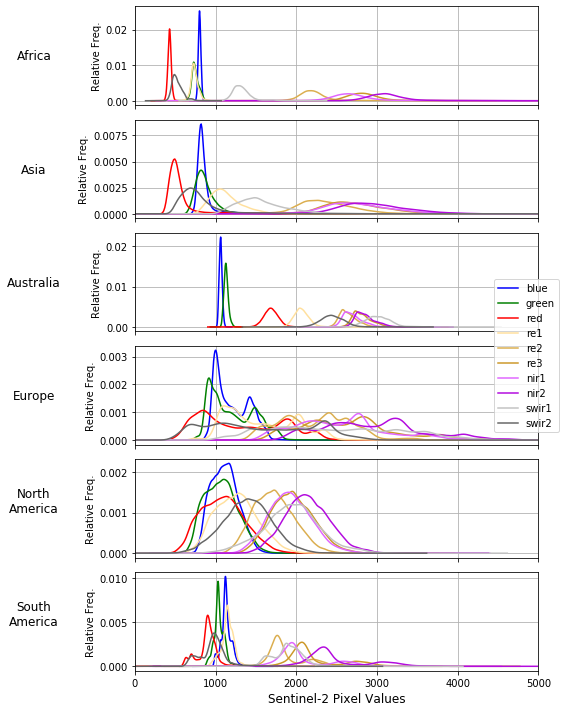

In [2]:
### Input distributions for each CONTINENT ###

np.random.seed(20200402)
num_patches = None

continents = config['all_continents']
continent_seasons = os.listdir('/data/datasets/sen12ms_segmentation')

fig, axes = plt.subplots(nrows=len(continents), sharex=True, sharey=False, figsize=(8, 10))

s2_colors = [
    'blue', 'green', 'red', # RGB
    '#ffe09e', '#dbae4f', '#cc9829', # RE (red edge)
    '#e066ff', '#b30bde', # NIR (near infrared)
    '#c2c2c2', '#666666' # SWIR (short-wave infrared)
]

for i, continent in enumerate(continents):
    print(f'CONTINENT: {continent}')
    # sample some patches for this continent
    scene_dirs = land_cover_utils.get_scene_dirs_for_continent(continent, config)
    patch_paths = land_cover_utils.get_segmentation_patch_paths_for_scene_dirs(scene_dirs)
    og_num_patches = len(patch_paths)
    if num_patches is not None and num_patches < og_num_patches:
        patch_paths = np.random.choice(patch_paths, num_patches, replace=False)
    print(f'sampled patches: {len(patch_paths)} (out of {og_num_patches})')
    # load patch data: S2, landuse
    continent_s2 = []
    continent_landuse = []
    for patch in patch_paths:
        s2 = np.load(os.path.join(patch, 's2.npy')).reshape((256*256, 10))
        landuse = np.load(os.path.join(patch, 'landuse.npy')).flatten()
        continent_s2.append(s2)
        continent_landuse.append(landuse)
    continent_s2 = np.concatenate(continent_s2, axis=0)
    continent_landuse = np.concatenate(continent_landuse, axis=0)
    print(f'continent_s2.shape: {continent_s2.shape}, continent_landuse.shape: {continent_landuse.shape}')
    # generate KDE plot for this continent
    s2_df = pd.DataFrame(s2, columns=config['s2_input_bands'])
    s2_df.plot.kde(grid=True, ax=axes[i], legend=None, xlim=(0,5000), color=s2_colors)
    axes[i].set_ylabel('Relative Freq.')
    axes[i].set_title(continent.replace('_', '\n'), x=-0.25, y=0.4, size='large')
    print()
    
# configure shared plot attributes
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.xlabel('Sentinel-2 Pixel Values', size='large')
fig.tight_layout()
plt.show()
    

season: spring
sampled patches: 40883 (out of 40883)
season_s2.shape: (2679308288, 10), season_landuse.shape: (2679308288,)

season: summer
sampled patches: 42000 (out of 45753)
season_s2.shape: (2752512000, 10), season_landuse.shape: (2752512000,)

season: fall
sampled patches: 42000 (out of 62201)
season_s2.shape: (2752512000, 10), season_landuse.shape: (2752512000,)

season: winter
sampled patches: 31825 (out of 31825)
season_s2.shape: (2085683200, 10), season_landuse.shape: (2085683200,)



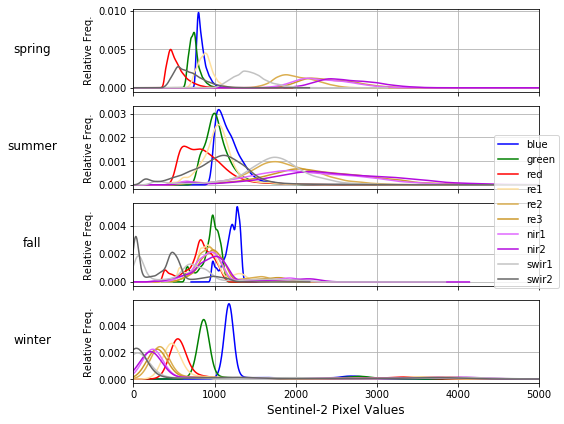

In [3]:
### Input distributions for each SEASON ###

np.random.seed(20200402)
num_patches = 42000

seasons = config['all_seasons']
continent_seasons = os.listdir('/data/datasets/sen12ms_segmentation')

fig, axes = plt.subplots(nrows=len(seasons), sharex=True, sharey=False, figsize=(8, 6))

s2_colors = [
    'blue', 'green', 'red', # RGB
    '#ffe09e', '#dbae4f', '#cc9829', # RE (red edge)
    '#e066ff', '#b30bde', # NIR (near infrared)
    '#c2c2c2', '#666666' # SWIR (short-wave infrared)
]

for i, season in enumerate(seasons):
    print(f'season: {season}')
    # sample some patches for this season
    scene_dirs = land_cover_utils.get_scene_dirs_for_season(season, config)
    patch_paths = land_cover_utils.get_segmentation_patch_paths_for_scene_dirs(scene_dirs)
    og_num_patches = len(patch_paths)
    if num_patches is not None and num_patches < og_num_patches:
        patch_paths = np.random.choice(patch_paths, num_patches, replace=False)
    print(f'sampled patches: {len(patch_paths)} (out of {og_num_patches})')
    # load patch data: S2, landuse
    season_s2 = []
    season_landuse = []
    for patch in patch_paths:
        s2 = np.load(os.path.join(patch, 's2.npy')).reshape((256*256, 10))
        landuse = np.load(os.path.join(patch, 'landuse.npy')).flatten()
        season_s2.append(s2)
        season_landuse.append(landuse)
    season_s2 = np.concatenate(season_s2, axis=0)
    season_landuse = np.concatenate(season_landuse, axis=0)
    print(f'season_s2.shape: {season_s2.shape}, season_landuse.shape: {season_landuse.shape}')
    # generate KDE plot for this season
    s2_df = pd.DataFrame(s2, columns=config['s2_input_bands'])
    s2_df.plot.kde(grid=True, ax=axes[i], legend=None, xlim=(0,5000), color=s2_colors)
    axes[i].set_ylabel('Relative Freq.')
    axes[i].set_title(season, x=-0.25, y=0.4, size='large')
    print()
    
# configure shared plot attributes
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.xlabel('Sentinel-2 Pixel Values', size='large')
fig.tight_layout()
plt.show()
    